# Unsupervised learning


In supervised machine learning, the task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$

In contrast, in unsupervised learning, the true values, $y_i$, are not known. In this case we cannot traine a model to predict anything, but instead try to expolore the X-matrix data itself. Unsupervised methods do predict something, but we do not know what it is before the function is targeted to the data.

$$
   ? = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$

Unsupervised methods are also often used for reducing the dimensions of the data by removing redundancy, and they work also in feature selection.

## Dimensionality reductions

The dimensionality of the design matrix, $X$, shown above is the number of features, $p$.

Dimensionality reductions means transforming data from a high dimensional representation to the lower dimensional representation, still retaining usefull properties of the original data. When dimensionality reduction is applied to matrix $X_{n\times p}$ the resulting reduced matrix will have as many samples as the original matrix, but the number of features $p$ is reduced.

### Principal Component Analysis (PCA)

PCA is one of the most well known dimensionality reduction methods. It transforms the set of observations with possibly correlated variables (=features) into a set of values of linearly uncorrelated variables, called principal components.

PCA transformation is defined in such a way that the first principal component has the largest possible variance and the rest of the components are ordered according to their variances in descending order.

PCA can be used as a dimensionality reduction method by removing some of the least important variables, and keeping the first most important.

This is very convenient, since the variables in high-dimensional problems are often correlated. The high dimensionality and co-variance between the features makes many statistical methods inapplicable. Eliminating the covariance and reducing the dimensionality makes many methods working better.

PCA was invented in 1901 by Karl Pearson, as an analogue of
the principal axis theorem in mechanics; it was later
independently developed (and named) by Harold Hotelling in
the 1930s.Depending on the field of application, it is also named thediscrete Karhunen Loeve transform (KLT) in signal processing,
the Hotelling transform in multivariate quality control, singular
value decomposition (SVD), and eigenvalue decomposition
(EVD).

Mathematically PCA projection works like this:
$$
    Y_{n\times p'} = X_{n\times p} ~ E_{p\times p'},
$$

where $n$ is number of samples, $p$ is number of variables (or features), $p'$ is possibly reduced number of features, $X$ is the design matrix, input to PCA, $E$ is matrix of eigenvectors, $Y$ is a matrix of principal components, projections. 

The most important component of $Y$ is the first column, and the rest of them carry less information in decreasing order. Dimensionality reduction is achieved by simply discarding the rightmost columns of $Y$. 

Original data can be reconstructed as follows:
$$
    X_{n\times p} = Y_{n\times p'} ~ E_{p'\times p},
$$


See references [1-4](#references)

In [41]:
# Lets load the Iris dataset again

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks')  
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
iris['category']=pd.Categorical(iris.species)
iris.category.cat.codes



0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

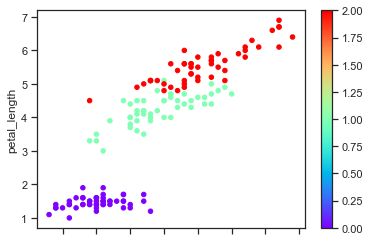

In [45]:
# To visualize the data, we have to plot it in 2D. Lets choose two variables
# which may be usefull. The category number is used as color index to the colormap
iris.plot.scatter(x='sepal_length', y='petal_length', 
                  c=iris.category.cat.codes, cmap='rainbow')


Text(0, 0.5, 'Percentage of variance explained')

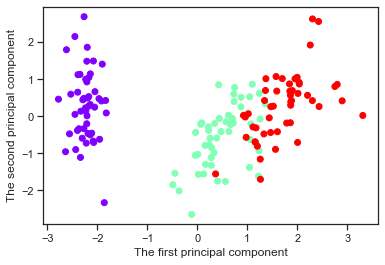

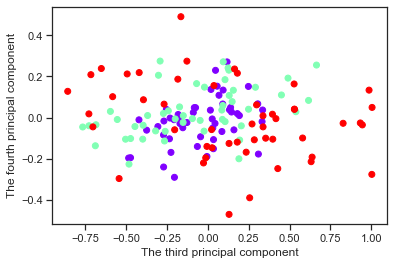

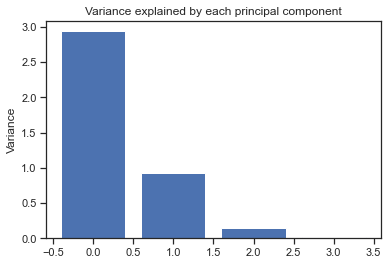

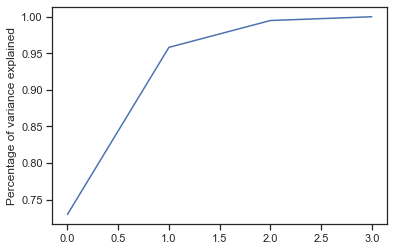

In [85]:
# Import Principal component analysis from Scikit Learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

I_scaled = scale(iris.iloc[:,:4])

# Apply it to the Iris dataset
pca = PCA(4)
pca.fit(I_scaled)
Y=pca.transform(I_scaled)

#Y=pca.fit_transform(iris.iloc[:,:4])
plt.scatter(Y[:,0], Y[:,1], c=iris.category.cat.codes, cmap='rainbow')
plt.xlabel('The first principal component')
plt.ylabel('The second principal component')
plt.figure()
plt.scatter(Y[:,2], Y[:,3], c=iris.category.cat.codes, cmap='rainbow')
plt.xlabel('The third principal component')
plt.ylabel('The fourth principal component')
plt.figure()
plt.bar(range(4), pca.explained_variance_)
plt.title('Variance explained by each principal component')
plt.ylabel('Variance')
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Percentage of variance explained')
#Y.shape

The mean values are different, but are the differences significant. Perhaps studying the overall variation or noise by means of standard deviation would help.

## Handwriting recognition

The handwriting recognition dataset contains 1797 digitized hand written written characters. The characters are digitized using 8x8 grid, so it 

In [217]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
digits.data

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## World happiness / Speaker recognition

In [186]:
#https://www.kaggle.com/primaryobjects/voicegender?select=voice.csv
#D=pd.read_csv('data/voice.csv')
#D['category'] = pd.Categorical(D.label)
#D['catcode'] = D.category.cat.codes
#del(D['label'])

D=pd.read_csv('data/happiness_2019.csv')
print(D.shape)
D.describe()
D

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


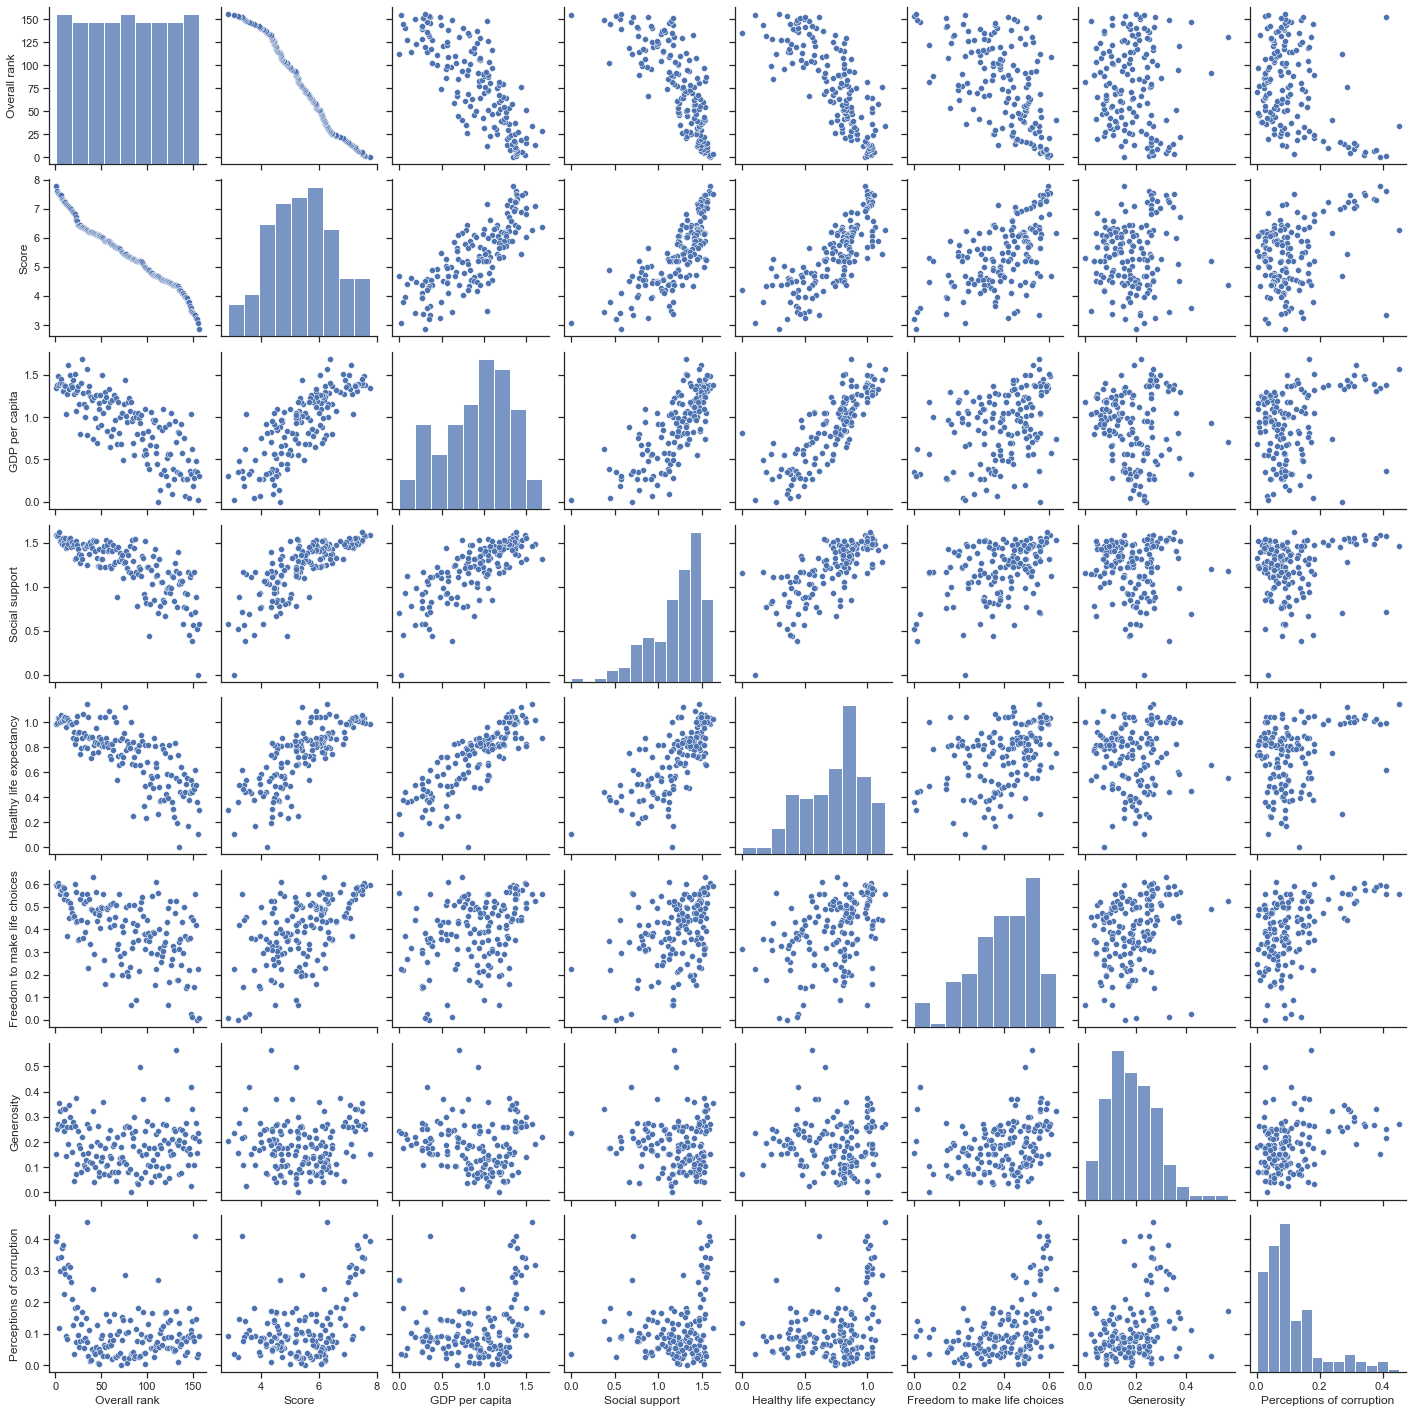

In [208]:
sns.pairplot(D)

In [193]:
from sklearn.preprocessing import scale
#D_scaled = scale(D.iloc[:,:20])
D_scaled = scale(D.iloc[:,3:])

Text(0, 0.5, 'Percentage of variance explained')

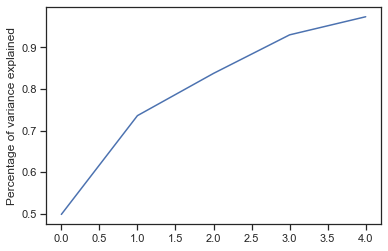

In [194]:
#pca=PCA(10)
pca=PCA(5)
#Y=pca.fit_transform(D.iloc[:,:20])
Y=pca.fit_transform(D_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Percentage of variance explained')

![image.png](kuvat/colormaps.png)

Text(0, 0.5, 'The second principal component')

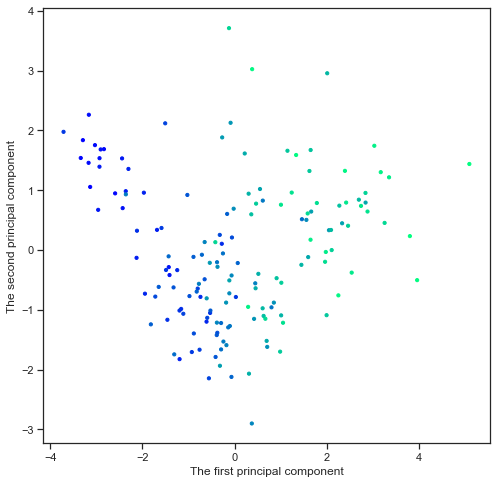

In [207]:
plt.figure(figsize=(8,8))
#plt.scatter(Y[:,0], Y[:,1], c=D.category.cat.codes, cmap='winter', s=1)
plt.scatter(Y[:,0], Y[:,1], c=D.iloc[:,0], cmap='winter', s=10)
plt.xlabel('The first principal component')
plt.ylabel('The second principal component')
#D.category.head()

In [210]:
# Get the eigenvectors
pca.components_.shape

(5, 6)

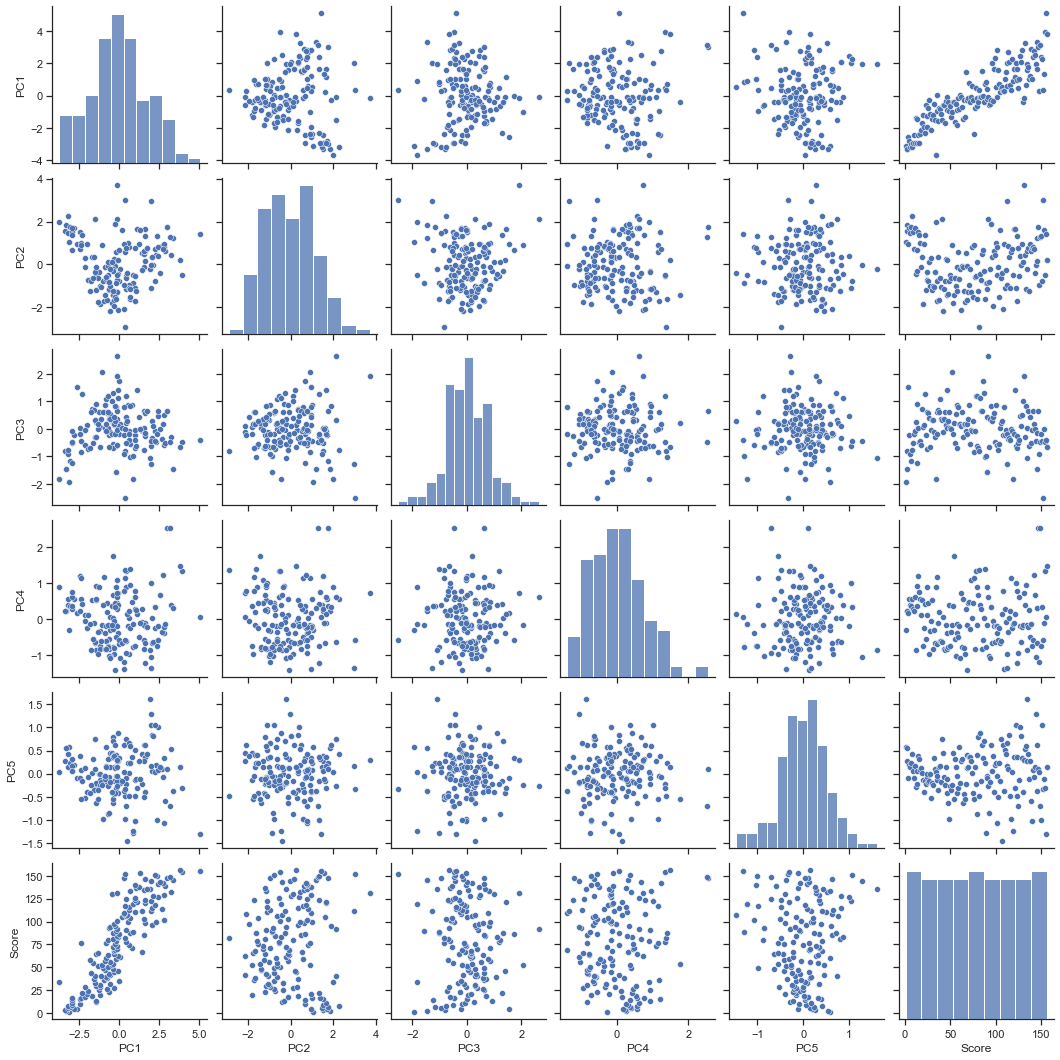

In [214]:
Ypd=pd.DataFrame(Y, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
Ypd['Score'] = D.iloc[:,0]
sns.pairplot(Ypd)

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

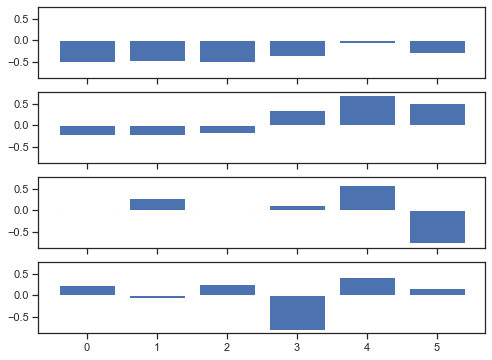

In [205]:
# Let's study how the principal components are constructed
# by plotting the eigenvectors
N=20
N=6
fig, (ax1,ax2,ax3,ax4)=plt.subplots(nrows=4, ncols=1, 
                                    sharex=True, 
                                    sharey=True, 
                                    figsize=(8,6))
ax1.bar(range(N),pca.components_[0,:])
ax2.bar(range(N),pca.components_[1,:])
ax3.bar(range(N),pca.components_[2,:])
ax4.bar(range(N),pca.components_[3,:])
ax4.set_xticks(range(N))
D.columns[3:]

# References <a id='references'></a>

1.  I. T. Jolliffe, “Discarding Variables in a Principal Component Analysis. Ii: Real Data,” Journal of the Royal Statistical Society: Series C (Applied Statistics), vol. 22, no. 1, pp. 21–31, 1973, doi: 10.2307/2346300.
2.  Q. Guo, W. Wu, D. L. Massart, C. Boucon, and S. de Jong, “Feature selection in principal component analysis of analytical data,” Chemometrics and Intelligent Laboratory Systems, vol. 61, no. 1, pp. 123–132, Feb. 2002, doi: 10.1016/S0169-7439(01)00203-9.
3.  I. T. Jolliffe, “Discarding Variables in a Principal Component Analysis. I: Artificial Data,” Journal of the Royal Statistical Society: Series C (Applied Statistics), vol. 21, no. 2, pp. 160–173, 1972, doi: 10.2307/2346488.
4. C. M. Bishop, “Pattern recognition and machine learning,” CERN Document Server, 2006. https://cds.cern.ch/record/998831 (accessed Oct. 02, 2020).
